# BANK MARKETING  [repositorio](https://github.com/aeespinosao/trabajo_machine_learning.git)

**Andres Esteban Espinosa Osorio**  
aeespinosao@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

## Definición del problema real
El incremento en las campañas de marketing en el tiempo ha reducido en gran manera el efecto sobre el público en general.
Además, las presiones económicas y la competencia han llevado a los gerentes de marketing a invertir en campañas dirigidas, las cuales se realizan sobre una estricta selección de contactos y pueden mejorarse gracias a la inteligencia de negocios(BI) y a la minería de datos(DM).

Campañas de marketing:
<ol>
  <li>Campañas masivas: Presentan baja efectividad</li>
  <li>Campañas dirigidas: Presentan alta efectividad</li>
</ol>

---

   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no") related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
   10 - day: last contact day of the month (numeric)
   
   11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
   12 - duration: last contact duration, in seconds (numeric) other attributes:
   
   13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   
   14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means             client was not previously contacted)
   
   15 - previous: number of contacts performed before this campaign and for this client (numeric)
   
   16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
   
 
  ---

## Definición del problema en términos de los datos

In [25]:
library(GoodmanKruskal)
library(clusterSim)
library(OneR)
library(caret)
library(C50)
library(gmodels)
library(e1071)

In [26]:
##
## Lee el archivo
##
data <- read.csv("bank-full.csv", 
                 stringsAsFactors = TRUE, sep=";")

head(data)


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [27]:
data<-data[,-16]
str(data)
data<-data[,-5]
data

'data.frame':	45211 obs. of  16 variables:
 $ age      : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 5 10 3 2 12 5 5 3 6 10 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 3 2 2 3 2 3 1 2 3 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 3 2 2 4 4 3 3 3 1 2 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 2 1 1 ...
 $ balance  : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing  : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 2 1 1 1 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ day      : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ duration : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0

age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,no
44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,no
33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,no
47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,no
33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,no
35,management,married,tertiary,231,yes,no,unknown,5,may,139,1,-1,0,no
28,management,single,tertiary,447,yes,yes,unknown,5,may,217,1,-1,0,no
42,entrepreneur,divorced,tertiary,2,yes,no,unknown,5,may,380,1,-1,0,no
58,retired,married,primary,121,yes,no,unknown,5,may,50,1,-1,0,no
43,technician,single,secondary,593,yes,no,unknown,5,may,55,1,-1,0,no


In [28]:
summary(data)

      age                 job           marital          education    
 Min.   :18.00   blue-collar:9732   divorced: 5207   primary  : 6851  
 1st Qu.:33.00   management :9458   married :27214   secondary:23202  
 Median :39.00   technician :7597   single  :12790   tertiary :13301  
 Mean   :40.94   admin.     :5171                    unknown  : 1857  
 3rd Qu.:48.00   services   :4154                                     
 Max.   :95.00   retired    :2264                                     
                 (Other)    :6835                                     
    balance       housing      loan            contact           day       
 Min.   : -8019   no :20081   no :37967   cellular :29285   Min.   : 1.00  
 1st Qu.:    72   yes:25130   yes: 7244   telephone: 2906   1st Qu.: 8.00  
 Median :   448                           unknown  :13020   Median :16.00  
 Mean   :  1362                                             Mean   :15.81  
 3rd Qu.:  1428                                     

In [29]:
corrmatrix<-GKtauDataframe(data, dgts = 2, includeNA = "ifany")
#corrmatrix<-
#corrmatrix2<-as.data.frame.matrix(corrmatrix)
#corrmatrix

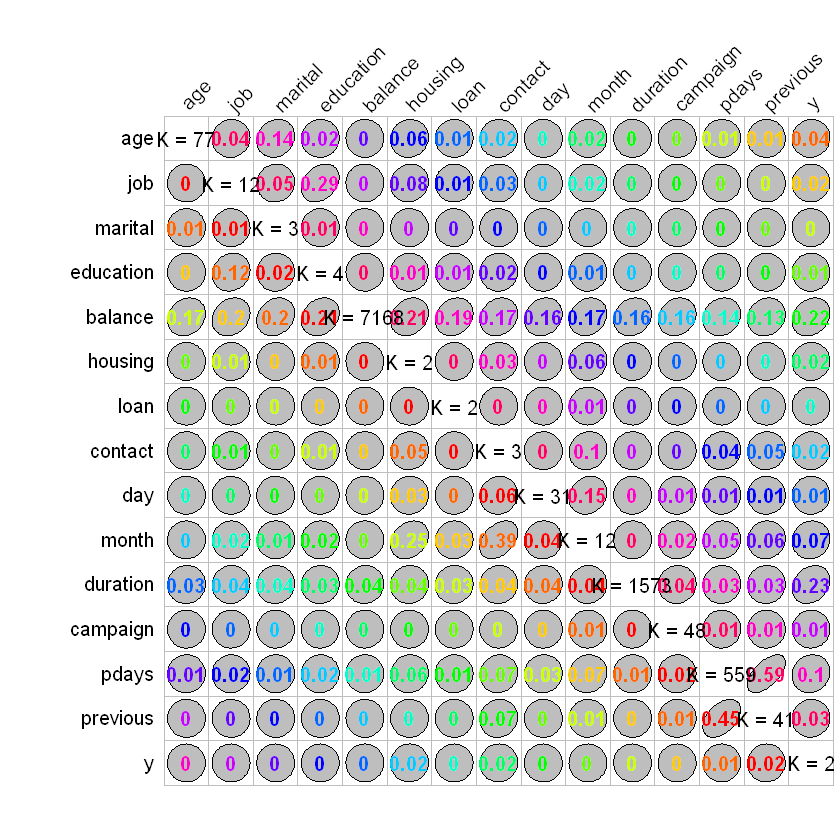

In [30]:
#diag(corrmatrix)<-1
#corrmatrix
plot(corrmatrix, colorPlot = TRUE, corrColors = NULL,
backgroundColor = "gray", diagColor = "black", diagSize = 1, )

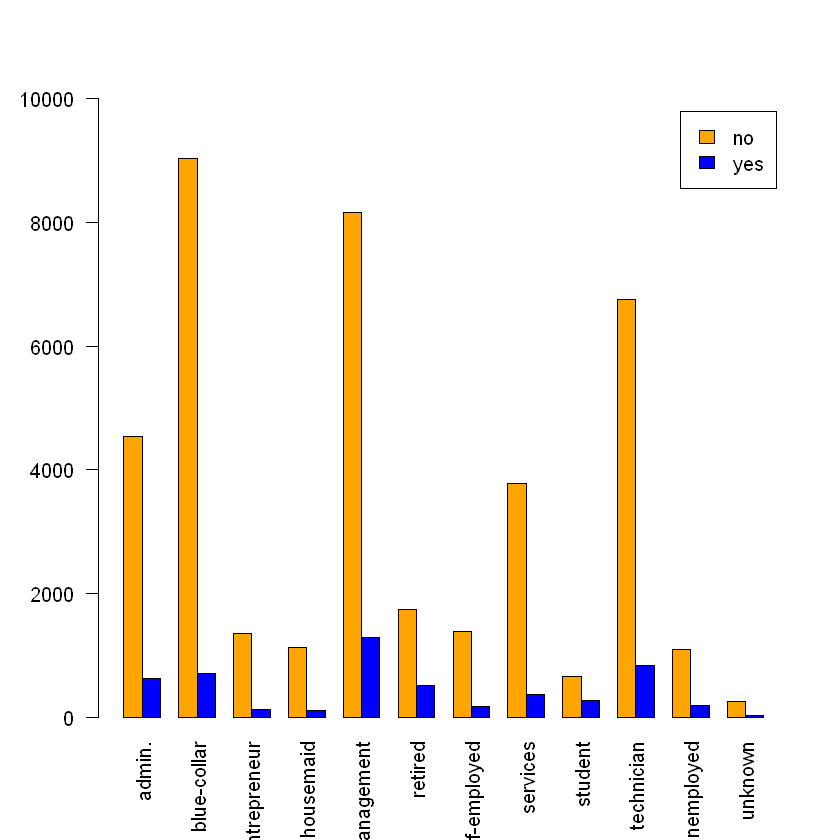

In [31]:
#M <- cor(mtcars)
#M
#ggcorrplot(corrmatrix2, method = "circle")

barplotdata<- data[,c('y','job')]
barplotdata <- table(barplotdata)
barplot(barplotdata,las=2,col=c("orange","blue"), beside=TRUE,ylim=c(0,10000),legend = rownames(barplotdata))

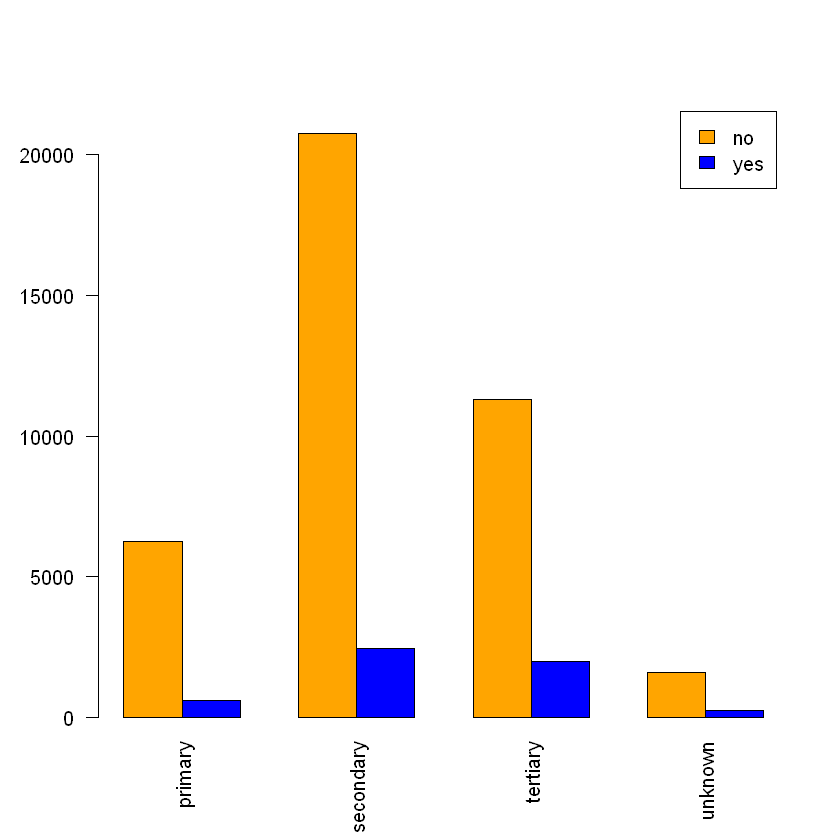

In [32]:
barplotdata<- data[,c('y','education')]
barplotdata <- table(barplotdata)
barplot(barplotdata,las=2,col=c("orange","blue"), beside=TRUE,ylim=c(0,22000),legend = rownames(barplotdata))

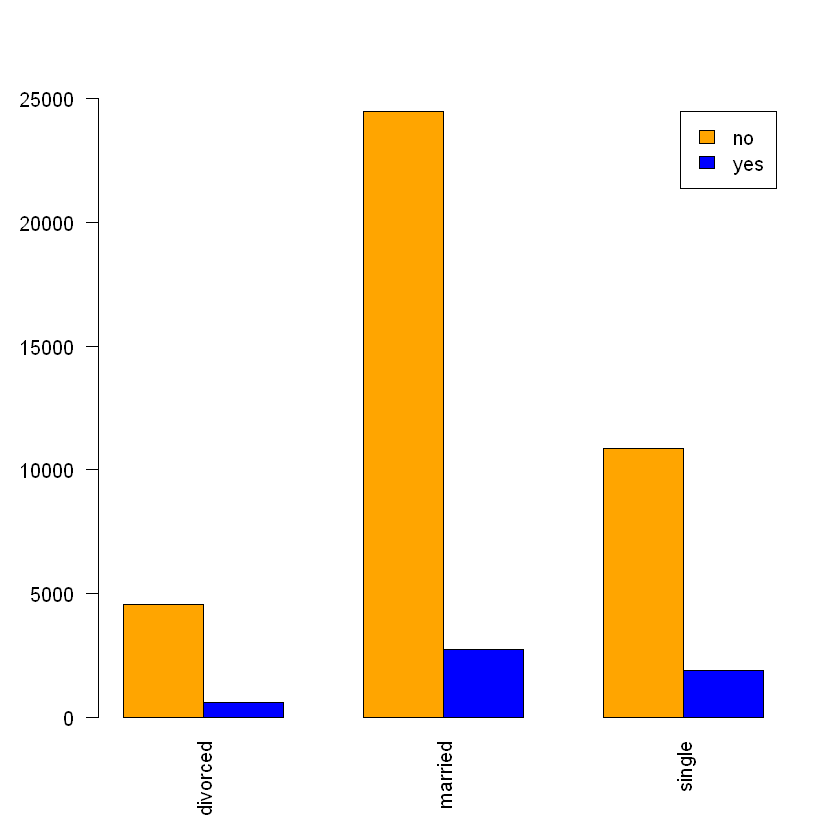

In [33]:
barplotdata<- data[,c('y','marital')]
barplotdata <- table(barplotdata)
barplot(barplotdata,las=2,col=c("orange","blue"), beside=TRUE,ylim=c(0,25000),legend = rownames(barplotdata))

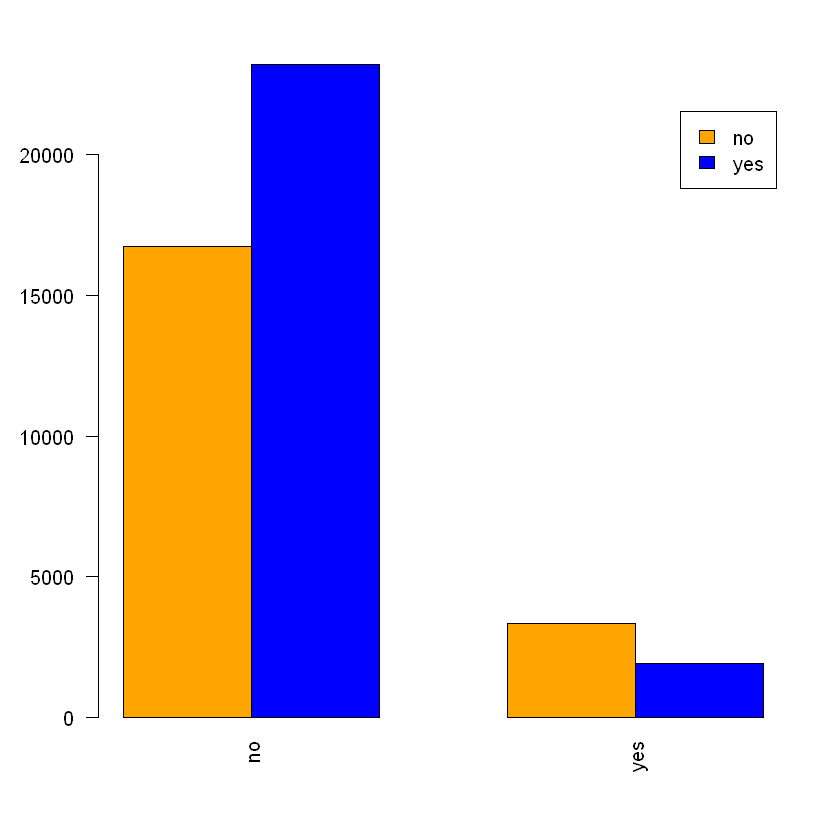

In [34]:
barplotdata<- data[,c('housing','y')]
barplotdata <- table(barplotdata)
barplot(barplotdata,las=2,col=c("orange","blue"), beside=TRUE,ylim=c(0,22000),legend = rownames(barplotdata))

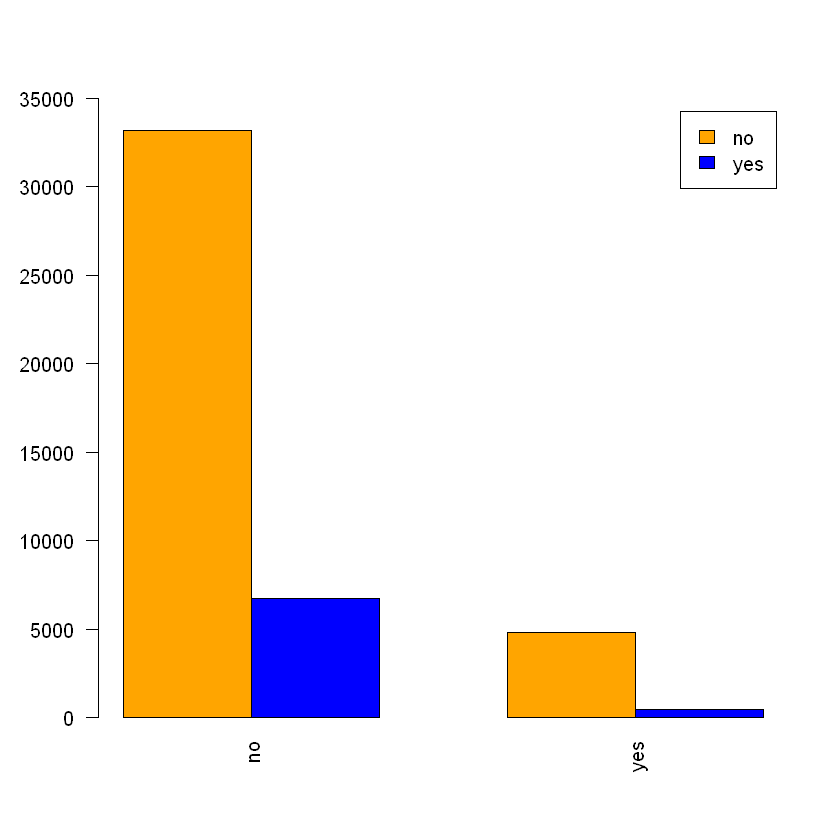

In [35]:
barplotdata<- data[,c('loan','y')]
barplotdata <- table(barplotdata)
barplot(barplotdata,las=2,col=c("orange","blue"), beside=TRUE,ylim=c(0,35000),legend = rownames(barplotdata))

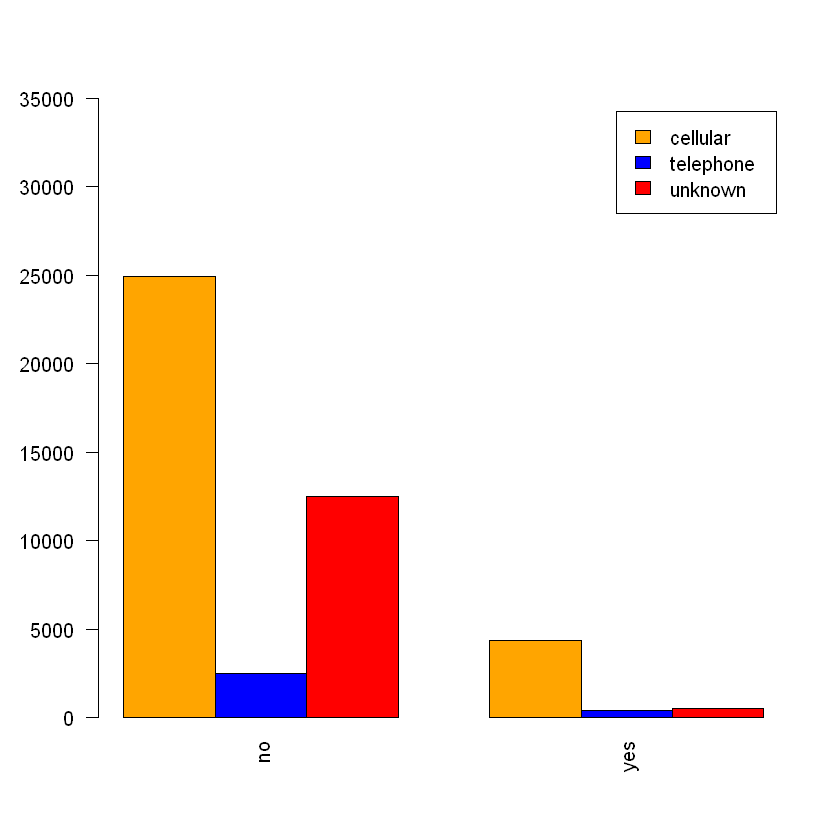

In [36]:
barplotdata<- data[,c('contact','y')]
barplotdata <- table(barplotdata)
barplot(barplotdata,las=2,col=c("orange","blue","red"), beside=TRUE,ylim=c(0,35000),legend = rownames(barplotdata))

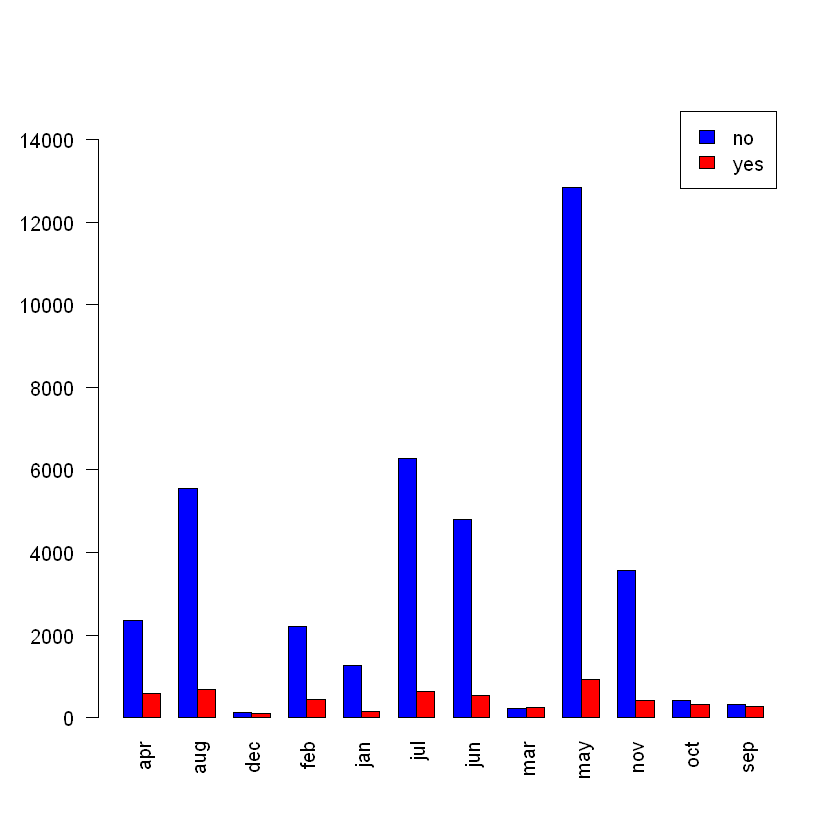

In [39]:
barplotdata<- data[,c('y','month')]
barplotdata <- table(barplotdata)
barplot(barplotdata,las=2,col=c("blue","red"), beside=TRUE,ylim=c(0,15000),legend = rownames(barplotdata))

In [40]:
normdata<-data.Normalization(data,type="n12",normalization="column")
#normdata<-as.data.frame(scale(data))
normdata
#

Warning message in data.Normalization(data, type = "n12", normalization = "column"):
"Data not numeric, normalization not applicable"Warning message in data.Normalization(data, type = "n12", normalization = "column"):
"Data not numeric, normalization not applicable"Warning message in data.Normalization(data, type = "n12", normalization = "column"):
"Data not numeric, normalization not applicable"Warning message in data.Normalization(data, type = "n12", normalization = "column"):
"Data not numeric, normalization not applicable"Warning message in data.Normalization(data, type = "n12", normalization = "column"):
"Data not numeric, normalization not applicable"Warning message in data.Normalization(data, type = "n12", normalization = "column"):
"Data not numeric, normalization not applicable"Warning message in data.Normalization(data, type = "n12", normalization = "column"):
"Data not numeric, normalization not applicable"Warning message in data.Normalization(data, type = "n12", normalizati

age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0.0075576078,5,2,3,0.0012059480,2,1,3,-0.006106776,9,5.180906e-05,-0.002677674,-0.001935077,-0.001184884,1
0.0013569624,10,3,2,-0.0020594328,2,1,3,-0.006106776,9,-1.957058e-03,-0.002677674,-0.001935077,-0.001184884,1
-0.0035149732,3,2,2,-0.0021011382,2,2,3,-0.006106776,9,-3.326741e-03,-0.002677674,-0.001935077,-0.001184884,1
0.0026856721,2,2,4,0.0002220087,2,1,3,-0.006106776,9,-3.034542e-03,-0.002677674,-0.001935077,-0.001184884,1
-0.0035149732,12,3,4,-0.0021026829,1,1,3,-0.006106776,9,-1.098724e-03,-0.002677674,-0.001935077,-0.001184884,1
-0.0026291667,5,2,3,-0.0017474144,2,1,3,-0.006106776,9,-2.176208e-03,-0.002677674,-0.001935077,-0.001184884,1
-0.0057294894,5,3,3,-0.0014137709,2,2,3,-0.006106776,9,-7.517379e-04,-0.002677674,-0.001935077,-0.001184884,1
0.0004711559,3,1,3,-0.0021011382,2,1,3,-0.006106776,9,2.225038e-03,-0.002677674,-0.001935077,-0.001184884,1
0.0075576078,6,2,1,-0.0019173254,2,1,3,-0.006106776,9,-3.801564e-03,-0.002677674,-0.001935077,-0.001184884,1
0.0009140592,10,3,2,-0.0011882527,2,1,3,-0.006106776,9,-3.710252e-03,-0.002677674,-0.001935077,-0.001184884,1


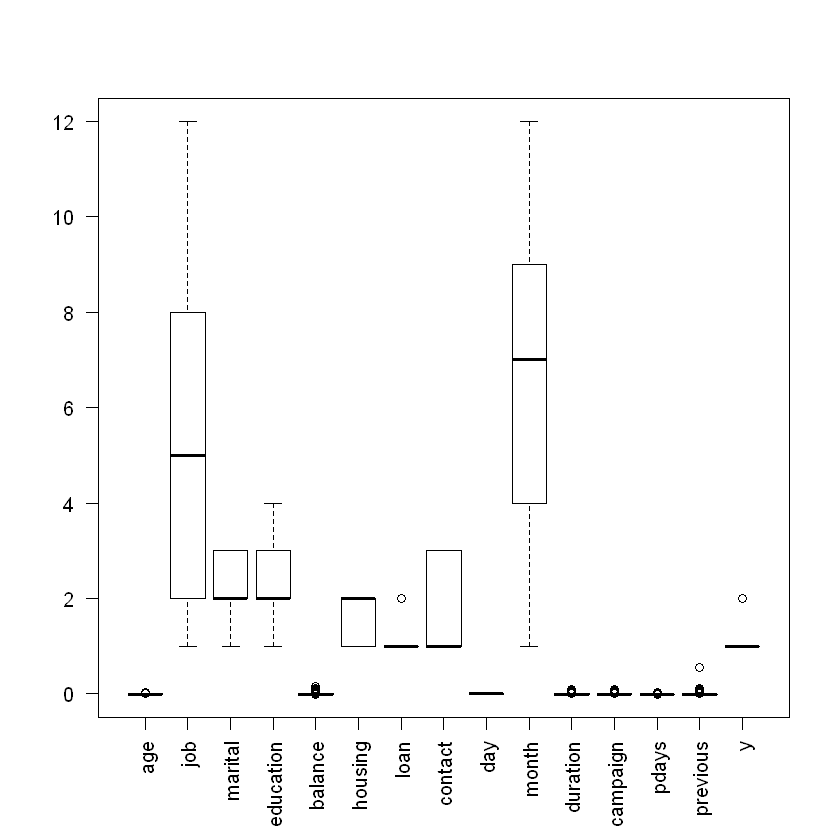

In [41]:
boxplot(normdata,las=2)

## One R

In [42]:
clf <- OneR(y ~ ., data = data, verbose = TRUE)
clf

Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute Accuracy
1 * duration  88.79%  
2   month     88.34%  
3   previous  88.3%   
4   age       88.3%   
4   job       88.3%   
4   marital   88.3%   
4   education 88.3%   
4   balance   88.3%   
4   housing   88.3%   
4   loan      88.3%   
4   contact   88.3%   
4   day       88.3%   
4   campaign  88.3%   
4   pdays     88.3%   
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'




Call:
OneR.formula(formula = y ~ ., data = data, verbose = TRUE)

Rules:
If duration = (-4.92,984]         then y = no
If duration = (984,1.97e+03]      then y = yes
If duration = (1.97e+03,2.95e+03] then y = yes
If duration = (2.95e+03,3.93e+03] then y = no
If duration = (3.93e+03,4.92e+03] then y = no

Accuracy:
40143 of 45211 instances classified correctly (88.79%)


In [43]:
summary(clf)


Call:
OneR.formula(formula = y ~ ., data = data, verbose = TRUE)

Rules:
If duration = (-4.92,984]         then y = no
If duration = (984,1.97e+03]      then y = yes
If duration = (1.97e+03,2.95e+03] then y = yes
If duration = (2.95e+03,3.93e+03] then y = no
If duration = (3.93e+03,4.92e+03] then y = no

Accuracy:
40143 of 45211 instances classified correctly (88.79%)

Contingency table:
     duration
y     (-4.92,984] (984,1.97e+03] (1.97e+03,2.95e+03] (2.95e+03,3.93e+03]
  no      * 39482            408                  24                 * 7
  yes        4630          * 624                * 29                   6
  Sum       44112           1032                  53                  13
     duration
y     (3.93e+03,4.92e+03]   Sum
  no                  * 1 39922
  yes                   0  5289
  Sum                   1 45211
---
Maximum in each column: '*'

Pearson's Chi-squared test:
X-squared = 2547.7, df = 4, p-value < 2.2e-16



## C5.0

In [51]:
train_sample <- 1:floor(nrow(data)*0.9)
X_train      <- data[ train_sample, -15]
X_test       <- data[-train_sample, -15]
##

y_train_true <- data$y[train_sample]
y_test_true  <- data$y[-train_sample]

prop.table(table(y_train_true))

prop.table(table(y_test_true))

y_train_true
        no        yes 
0.92236231 0.07763769 

y_test_true
       no       yes 
0.5289695 0.4710305 

In [52]:
clf <- C5.0(X_train, y_train_true)
clf


Call:
C5.0.default(x = X_train, y = y_train_true)

Classification Tree
Number of samples: 40689 
Number of predictors: 14 

Tree size: 256 

Non-standard options: attempt to group attributes


In [53]:
summary(clf)


Call:
C5.0.default(x = X_train, y = y_train_true)


C5.0 [Release 2.07 GPL Edition]  	Thu Apr 12 22:09:44 2018
-------------------------------

Class specified by attribute `outcome'

Read 40689 cases (15 attributes) from undefined.data

Decision tree:

duration > 473:
:...duration > 647:
:   :...duration <= 827:
:   :   :...contact in {telephone,unknown}: no (454/124)
:   :   :   contact = cellular:
:   :   :   :...month in {dec,oct,sep}: no (0)
:   :   :       month in {jun,may}:
:   :   :       :...job in {admin.,management,self-employed,student,
:   :   :       :   :       unknown}: yes (67/19)
:   :   :       :   job in {entrepreneur,housemaid,technician}: no (31/11)
:   :   :       :   job = retired:
:   :   :       :   :...duration <= 742: yes (4)
:   :   :       :   :   duration > 742: no (3)
:   :   :       :   job = services:
:   :   :       :   :...housing = no: no (2)
:   :   :       :   :   housing = yes: yes (21/4)
:   :   :       :   job = unemployed:
:   :   :       : 

In [54]:
y_test_pred <- predict(clf, X_test)
CrossTable(y_test_true, 
           y_test_pred,
           prop.chisq = FALSE, 
           prop.c = FALSE, 
           prop.r = FALSE,
           dnn = c('actual answer', 'predicted answer'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  4522 

 
              | predicted answer 
actual answer |        no |       yes | Row Total | 
--------------|-----------|-----------|-----------|
           no |      1981 |       411 |      2392 | 
              |     0.438 |     0.091 |           | 
--------------|-----------|-----------|-----------|
          yes |      1538 |       592 |      2130 | 
              |     0.340 |     0.131 |           | 
--------------|-----------|-----------|-----------|
 Column Total |      3519 |      1003 |      4522 | 
--------------|-----------|-----------|-----------|

 


## rpart

In [55]:
train_sample <- 1:floor(nrow(data)*0.9)
X_train      <- data[ train_sample, ]
X_test       <- data[-train_sample, ]

rtrain<- train(y~.,data=X_train,method="rpart")

In [56]:
rtrain

CART 

40689 samples
   14 predictor
    2 classes: 'no', 'yes' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 40689, 40689, 40689, 40689, 40689, 40689, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa    
  0.005223172  0.9287305  0.3493300
  0.006805951  0.9284820  0.3429658
  0.037670149  0.9251899  0.1719446

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.005223172.

In [57]:
y_test_pred <- predict(rtrain, X_test)
CrossTable(X_test$y, 
           y_test_pred,
           prop.chisq = FALSE, 
           prop.c = FALSE, 
           prop.r = FALSE,
           dnn = c('actual answer', 'predicted answer'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  4522 

 
              | predicted answer 
actual answer |        no |       yes | Row Total | 
--------------|-----------|-----------|-----------|
           no |      2261 |       131 |      2392 | 
              |     0.500 |     0.029 |           | 
--------------|-----------|-----------|-----------|
          yes |      1923 |       207 |      2130 | 
              |     0.425 |     0.046 |           | 
--------------|-----------|-----------|-----------|
 Column Total |      4184 |       338 |      4522 | 
--------------|-----------|-----------|-----------|

 


## Naive Bayes

In [58]:
train_sample <- 1:floor(nrow(data)*0.9)
X_train      <- data[ train_sample, ]
X_test       <- data[-train_sample, ]

bayes <- naiveBayes(y ~ ., data = X_train)

In [60]:
summary(bayes)
bayes

        Length Class  Mode     
apriori  2     table  numeric  
tables  14     -none- list     
levels   2     -none- character
call     4     -none- call     


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        no        yes 
0.92236231 0.07763769 

Conditional probabilities:
     age
Y         [,1]      [,2]
  no  40.60834  9.597434
  yes 39.95600 11.274300

     job
Y          admin. blue-collar entrepreneur   housemaid  management     retired
  no  0.111883826 0.236344258  0.035358380 0.027897682 0.202717826 0.035518252
  yes 0.121240899 0.176005065  0.030072808 0.018360241 0.239949351 0.056663501
     job
Y     self-employed    services     student  technician  unemployed     unknown
  no    0.035118572 0.098614442 0.012416733 0.170929923 0.027204903 0.005995204
  yes   0.038619816 0.082304527 0.030389364 0.166508389 0.033871478 0.006014562

     marital
Y      divorced   married    single
  no  0.1162537 0.6164402 0.2673062
  yes 0.1307376 0.5121874 0.3570750

     education
Y        primary  secondary   tertiary    unknown
  no  0.15861977 0.52637

In [61]:
y_test_pred <- predict(bayes, X_test)
CrossTable(X_test$y, 
           y_test_pred,
           prop.chisq = FALSE, 
           prop.c = FALSE, 
           prop.r = FALSE,
           dnn = c('actual answer', 'predicted answer'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  4522 

 
              | predicted answer 
actual answer |        no |       yes | Row Total | 
--------------|-----------|-----------|-----------|
           no |      1998 |       394 |      2392 | 
              |     0.442 |     0.087 |           | 
--------------|-----------|-----------|-----------|
          yes |      1627 |       503 |      2130 | 
              |     0.360 |     0.111 |           | 
--------------|-----------|-----------|-----------|
 Column Total |      3625 |       897 |      4522 | 
--------------|-----------|-----------|-----------|

 


#### ONER
Rules:
If duration = (-4.92,984]         then y = no

If duration = (984,1.97e+03]      then y = yes

If duration = (1.97e+03,2.95e+03] then y = yes

If duration = (2.95e+03,3.93e+03] then y = no

If duration = (3.93e+03,4.92e+03] then y = no

Accuracy:
40143 of 45211 instances classified correctly (88.79%)

ONER tomo como mejor clasificador el tiempo de duración de la llamada el cual le da una precisión de clasificación del 88.79%
dando como resultado que llamadas muy cortas o muy largas dan como resultado no y llamadas de tiempo medio dan como resutado si

#### C5.0
 
 (a)   (b)    <-classified as
	  ----  ----
	 36878   652    (a): class no
	  1497  1662    (b): class yes


	Attribute usage:

	100.00%	duration
	 97.12%	month
	 34.48%	contact
	 23.99%	day
	 12.27%	housing
	  4.40%	job
	  2.12%	marital
	  1.92%	campaign
	  1.52%	education
	  0.87%	previous
	  0.81%	pdays
	  0.80%	loan
	  0.54%	balance
	  0.47%	age
      
predicted answer |        no |       yes | Row Total | 
--------------|-----------|-----------|-----------|
actual answer |     |       |       | 
              |      |      |           | 
           no |      1981 |       411 |      2392 | 
              |     0.438 |     0.091 |           | 
          yes |      1538 |       592 |      2130 | 
              |     0.340 |     0.131 |           | 
 Column Total |      3519 |      1003 |      4522 |  
 
 En este caso se toma como mejor clasificador la duración de la llamada, el %error final del arbol es de 5.3%
#### RPART

cp           Accuracy   Kappa    
  0.005223172  0.9287305  0.3493300
  0.006805951  0.9284820  0.3429658
  0.037670149  0.9251899  0.1719446
  
  
predicted answer |        no |       yes | Row Total | 
--------------|-----------|-----------|-----------|
actual answer |     |       |       | 
           no |      2261 |       131 |      2392 | 
              |     0.500 |     0.029 |           | 
          yes |      1923 |       207 |      2130 | 
              |     0.425 |     0.046 |           | 
 Column Total |      4184 |       338 |      4522 |
 
 Este modelo presenta una precisión del 92% al momento de clasificar la información.
#### BAYES


predicted answer |        no |       yes | Row Total | 
--------------|-----------|-----------|-----------|
actual answer |     |       |       | 
              |      |      |           | 
           no |      1998 |       394 |      2392 | 
              |     0.442 |     0.087 |           | 
          yes |      1627 |       503 |      2130 | 
              |     0.360 |     0.111 |           | 
 Column Total |      3625 |       897 |      4522 | 

Este modelo presenta una clasifidos correctamente alrededor de 2300 datos